# Training a model

In [1]:
# Importing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

import scipy.stats as stat
import pylab

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, confusion_matrix, classification_report, RocCurveDisplay
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans

import tensorflow as tf
import keras
from keras import Sequential
from keras.layers import BatchNormalization, Flatten, Dense, Dropout, Conv1D, MaxPool1D
from keras.optimizers import Adam

# from imblearn.over_sampling import RandomOverSampler
# from imblearn.under_sampling import RandomUnderSampler

sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = [8, 6]

import warnings
warnings.filterwarnings('ignore')

RSEED = 2

## Preprocessing

In [2]:
# Read data
df = pd.read_csv('../data/clean/data_cleaned.csv')
df.head(2)

,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105


### Subsetting data into train and test sample

In [3]:
train = df.sample(frac=0.9)
test = df.drop(train.index)

### Managing umbalanced data

In [4]:
# Target count
train['attrition_flag'].value_counts()

attrition_flag
Existing Customer    7642
Attrited Customer    1472
Name: count, dtype: int64

In [5]:
target_min_class = train[train['attrition_flag'] =='Attrited Customer']
target_max_class = train[train['attrition_flag'] =='Existing Customer']

In [6]:
count_max, count_min = train['attrition_flag'].value_counts()

In [7]:
print(count_max, count_min)

7642 1472


In [8]:
oversample = target_min_class.sample(count_max, replace=True, random_state=RSEED)
undersample = target_max_class.sample(count_min, random_state=RSEED)

df_over = pd.concat([oversample, target_max_class], axis=0, sort=True)
df_under = pd.concat([undersample, target_min_class], axis=0, sort=True)

print(df_over['attrition_flag'].value_counts())
print(df_under['attrition_flag'].value_counts())

attrition_flag
Attrited Customer    7642
Existing Customer    7642
Name: count, dtype: int64
attrition_flag
Existing Customer    1472
Attrited Customer    1472
Name: count, dtype: int64


### Target - features split

In [9]:
# Uncomment the method to use for target - features split

## Target - features split by oversaple
# X = df_over.drop('attrition_flag', axis=1)
# y = df_over['attrition_flag']

## Target - features split by undersaple
X = df_under.drop('attrition_flag', axis=1)
y = df_under['attrition_flag']

In [10]:
print(X.shape)
print(y.shape)

(2944, 19)
(2944,)


### Standarizing the data

Defining categorical and numerical features

In [15]:
num = X.select_dtypes(exclude='object').columns
cat = X.select_dtypes(include='object').columns

cat_enc = OneHotEncoder(drop='if_binary')
scaler = StandardScaler()
label_enc = LabelEncoder()

X_preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder', cat_enc, cat),
        ('StandardScaler', scaler, num)
    ]
)

y_preprocessor = ColumnTransformer(
    [
        ('LabelEncoder', label_enc, y)
    ]
)

In [19]:
cat

Index(['card_category', 'education_level', 'gender', 'income_category',
       'marital_status'],
      dtype='object')

In [17]:
X = X_preprocessor.fit_transform(X)
#y = y_preprocessor.fit_transform(y)

ValueError: Specifying the columns using strings is only supported for dataframes.

Splitting the data 

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=RSEED, stratify=y)

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(2364, 19)
(592, 19)
(2364,)
(592,)


### Standarizing the data

Defining categorical and numerical features

In [ ]:
# nom_cat = ['gender', 'marital_status']

# ord_cat = ['education_level', 'income_category', 'card_category']

# num =['months_on_book', 'credit_limit', 'total_revolving_bal',
#        'avg_open_to_buy', 'total_amt_chng_q4_q1', 'total_trans_amt',
#        'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio',
#        'customer_age', 'total_relationship_count', 'months_inactive_12_mon',
#        'contacts_count_12_mon', 'dependent_count']



Converting categorical into numerical data

In [ ]:
# #Applying One Hot Encoder to nominal data
# nom_enc = OneHotEncoder(drop='if_binary')

# X_train_n_enc = nom_enc.fit_transform(X_train[nom_cat]).toarray()
# X_val_n_enc = nom_enc.transform(X_val[nom_cat]).toarray()

In [ ]:
# # Applying Ordinal Encoder to ordinal data
# ord_enc = OrdinalEncoder(categories=[['Uneducated', 'Unknown', 'High School', 'College', 
#                                       'Graduate', 'Post-Graduate', 'Doctorate'], 
#                                       ['Less than $40K', 'Unknown', '$40K - $60K', '$60K - $80K', '$80K - $120K',
#                                        '$120K +'], 
#                                        ['Blue', 'Gold', 'Platinum', 'Silver']])
# X_train_o_enc = ord_enc.fit_transform(X_train[ord_cat])
# X_val_o_enc = ord_enc.transform(X_val[ord_cat])

# ord_enc.categories_

[array(['Uneducated', 'Unknown', 'High School', 'College', 'Graduate',
        'Post-Graduate', 'Doctorate'], dtype=object),
 array(['Less than $40K', 'Unknown', '$40K - $60K', '$60K - $80K',
        '$80K - $120K', '$120K +'], dtype=object),
 array(['Blue', 'Gold', 'Platinum', 'Silver'], dtype=object)]

In [ ]:
# # Applying Label Encoder to the target data
# lab_enc = LabelEncoder()
# y_train_enc = lab_enc.fit_transform(y_train)
# y_val_enc = lab_enc.transform(y_val)

In [ ]:
# print(X_train_n_enc.shape)
# print(X_train_o_enc.shape)

NameError: name 'X_train_n_enc' is not defined

In [ ]:
# X_train_cat_enc = np.hstack((X_train_n_enc, X_train_o_enc))
# X_train_cat_enc.shape

(2364, 8)

In [ ]:
# X_val_cat_enc = np.hstack((X_val_n_enc, X_val_o_enc))
# X_val_cat_enc.shape

(592, 8)

In [ ]:
# train_num = X_train[num]
# val_num = X_val[num]

In [ ]:
# train_num.shape

(2364, 14)

In [ ]:
#[print(f'{c}\n {df[c].value_counts()}\n \n-------------\n') for c in train_cat]

Checking the feature's distribuition

In [316]:
# Defining distribuition plot
def check_distro(df):
    for feature in df:
        plt.figure(figsize=(6,2))
        plt.subplot(1,2,1)
        sns.histplot(df[feature])
        plt.title(feature)
        plt.subplot(1,2,2)
        stat.probplot(df[feature], dist='norm', plot=pylab)
        plt.show()

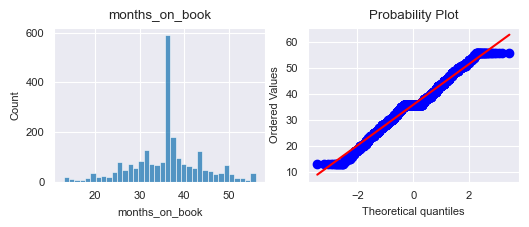

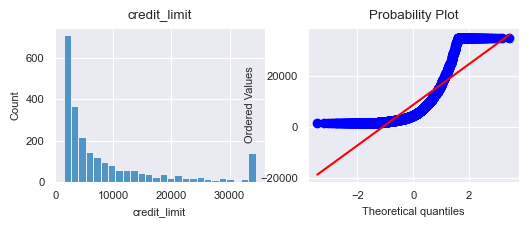

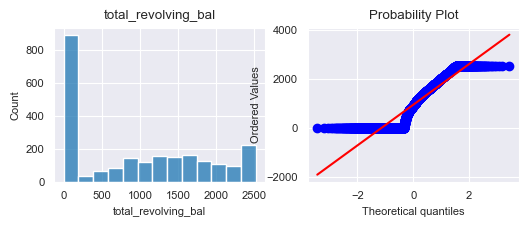

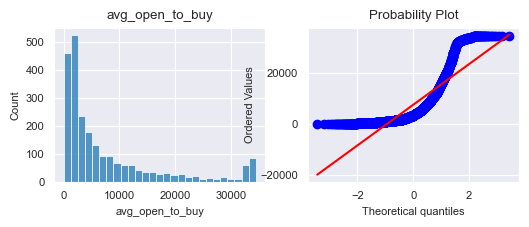

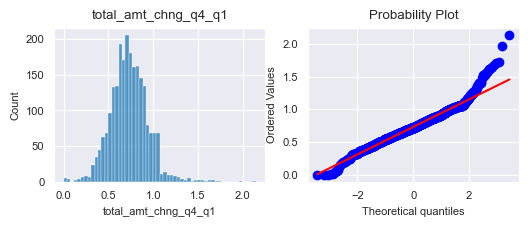

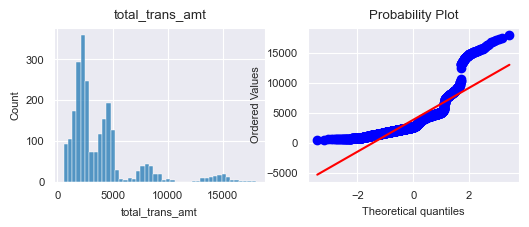

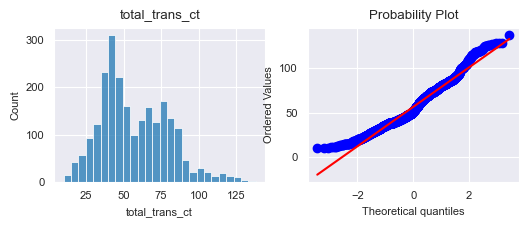

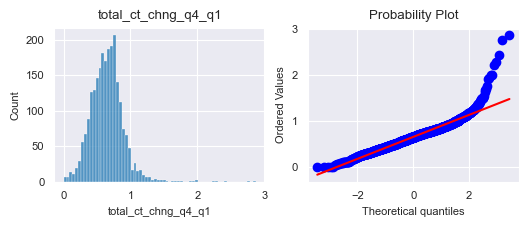

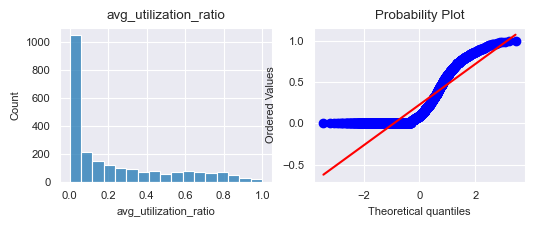

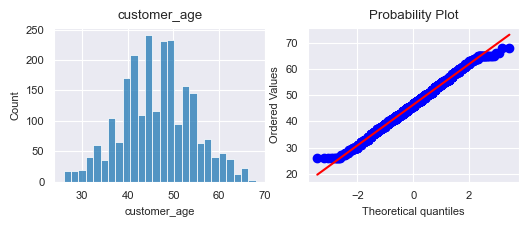

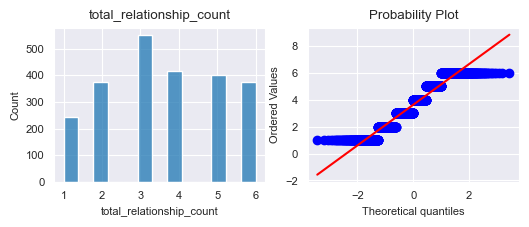

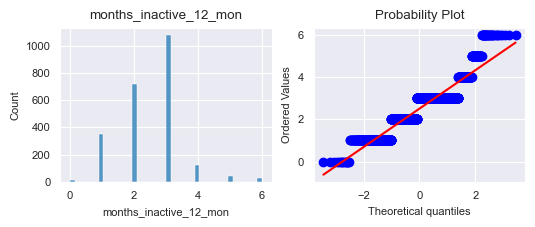

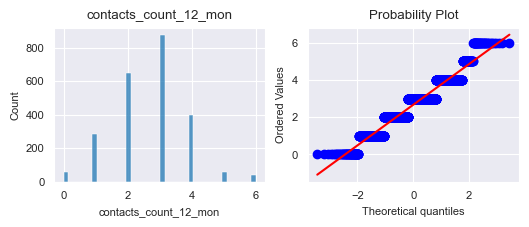

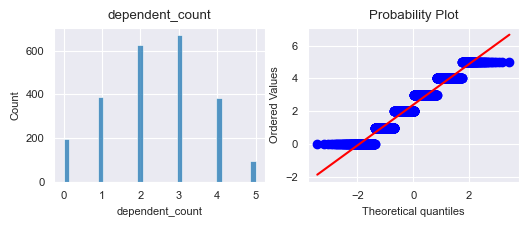

In [317]:
#check_distro(train_num)
check_distro(X_train)

Columns to transfor into gaussian

In [318]:
cols_to_trans = ['credit_limit', 'total_revolving_bal',
       'avg_open_to_buy', 'total_amt_chng_q4_q1', 'total_trans_amt',
       'total_ct_chng_q4_q1', 'avg_utilization_ratio',]

col_to_preserve = ['months_on_book', 
       'total_trans_ct', 'total_ct_chng_q4_q1', 
       'customer_age', 'total_relationship_count', 'months_inactive_12_mon',
       'contacts_count_12_mon', 'dependent_count']

In [319]:
# log transformation
#log_df = np.log(df[cols_to_trans])
log_train = X_train[cols_to_trans].apply(lambda x: np.log(x))

# reciprocal transformation
reci_train = X_train[cols_to_trans].apply(lambda x: 1/x)

# square root transformation
square_train = X_train[cols_to_trans].apply(lambda x: np.sqrt(x))#**(1/2)) 

# exponentioal transformation
ex_train = X_train[cols_to_trans].apply(lambda x: x**(1/1.2))

# boxCOx transformation
box_train = X_train[cols_to_trans].apply(lambda x: stat.boxcox(x,0.42))

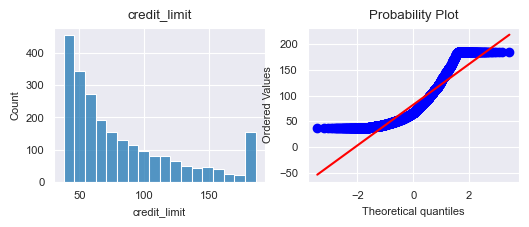

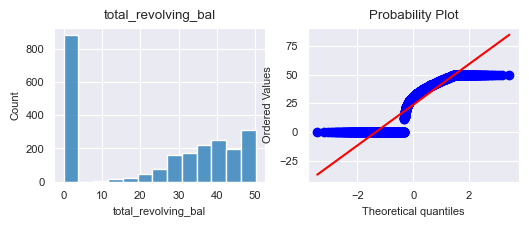

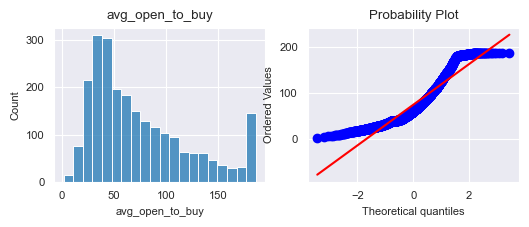

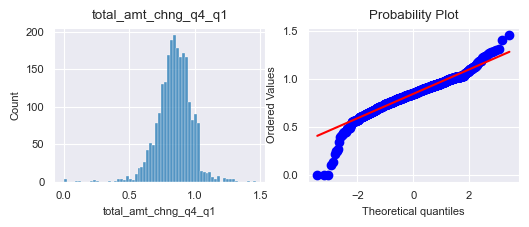

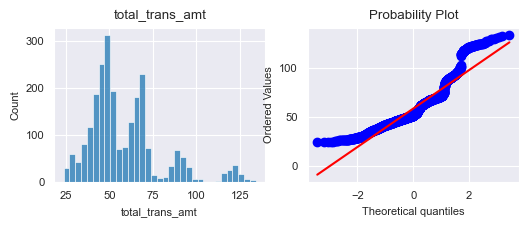

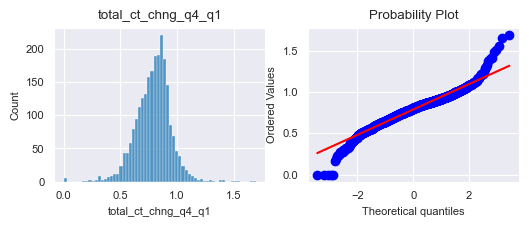

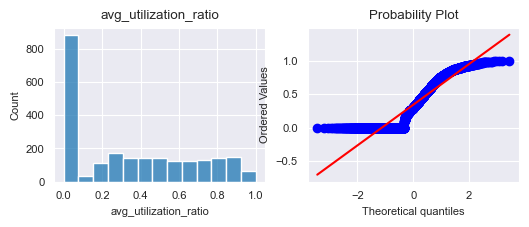

In [320]:
check_distro(square_train)

In [321]:
# square root transformation
square_val = X_val[cols_to_trans].apply(lambda x: np.sqrt(x))#**(1/2)) 

In [323]:
X_train_enc = np.hstack((square_train, X_train[col_to_preserve],  X_train_cat_enc))
X_train_enc

array([[185.78482177,   0.        , 185.78482177, ...,   4.        ,
          5.        ,   0.        ],
       [132.37446884,   0.        , 132.37446884, ...,   4.        ,
          4.        ,   0.        ],
       [ 50.80354318,  41.49698784,  29.30870178, ...,   4.        ,
          0.        ,   0.        ],
       ...,
       [ 42.56759331,  42.40283009,   3.74165739, ...,   1.        ,
          1.        ,   0.        ],
       [ 46.54030511,  29.83286778,  35.7211422 , ...,   3.        ,
          0.        ,   0.        ],
       [ 74.69270379,  37.72267223,  64.46704585, ...,   0.        ,
          2.        ,   0.        ]])

In [324]:
X_val_enc = np.hstack((square_val, val_num[col_to_preserve], X_val_cat_enc))
X_val_enc

array([[60.90976933, 50.16971198, 34.53983208, ...,  4.        ,
         4.        ,  0.        ],
       [37.92492584,  0.        , 37.92492584, ...,  4.        ,
         0.        ,  0.        ],
       [43.58898944,  0.        , 43.58898944, ...,  6.        ,
         2.        ,  0.        ],
       ...,
       [55.84800802, 50.16971198, 24.53568829, ...,  3.        ,
         0.        ,  0.        ],
       [76.51797175,  0.        , 76.51797175, ...,  1.        ,
         0.        ,  0.        ],
       [65.71149062, 48.56953778, 44.26059195, ...,  4.        ,
         2.        ,  0.        ]])

standarize

In [325]:
print(X_train_enc.shape)
print(X_val_enc.shape)

(2364, 23)
(592, 23)


In [326]:
X_val_enc

array([[60.90976933, 50.16971198, 34.53983208, ...,  4.        ,
         4.        ,  0.        ],
       [37.92492584,  0.        , 37.92492584, ...,  4.        ,
         0.        ,  0.        ],
       [43.58898944,  0.        , 43.58898944, ...,  6.        ,
         2.        ,  0.        ],
       ...,
       [55.84800802, 50.16971198, 24.53568829, ...,  3.        ,
         0.        ,  0.        ],
       [76.51797175,  0.        , 76.51797175, ...,  1.        ,
         0.        ,  0.        ],
       [65.71149062, 48.56953778, 44.26059195, ...,  4.        ,
         2.        ,  0.        ]])

In [327]:
# Applying Standard Scaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_enc)
X_val_scaled = scaler.transform(X_val_enc)

## Training

### Training a logistic model

In [328]:
lr = LogisticRegression()

lr.fit(X_train_scaled, y_train_enc)
y_pred = lr.predict(X_train_scaled)

Results on train

In [345]:
# Printing results

def results(y_test, y_pred):
    print('Accuracy : {:.2f}'.format(accuracy_score(y_test, y_pred)))
    print('Recall : {:.2f}'.format(recall_score(y_test, y_pred)))
    print("Precision: {:.2f}".format(precision_score(y_test, y_pred)))
    print('------'*10)
    print(f'Classification Report: {classification_report(y_test, y_pred)}') 

    # Plotting the confusion matrix
    heatmap = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt = 'd')

    plt.rcParams['font.size'] = 8
    plt.show()

    roc = RocCurveDisplay.from_predictions(
        y_test,
        y_pred,
        name="Predictions",
        color="red",
        plot_chance_level=True,
    )
    _ = display.ax_.set(
        xlabel="False Positive Rate",
        ylabel="True Positive Rate",
        title="ROC curves")
    
    return heatmap, roc, _

Accuracy : 0.86
Recall : 0.86
Precision: 0.86
------------------------------------------------------------
Classification Report:               precision    recall  f1-score   support

           0       0.86      0.86      0.86      1182
           1       0.86      0.86      0.86      1182

    accuracy                           0.86      2364
   macro avg       0.86      0.86      0.86      2364
weighted avg       0.86      0.86      0.86      2364



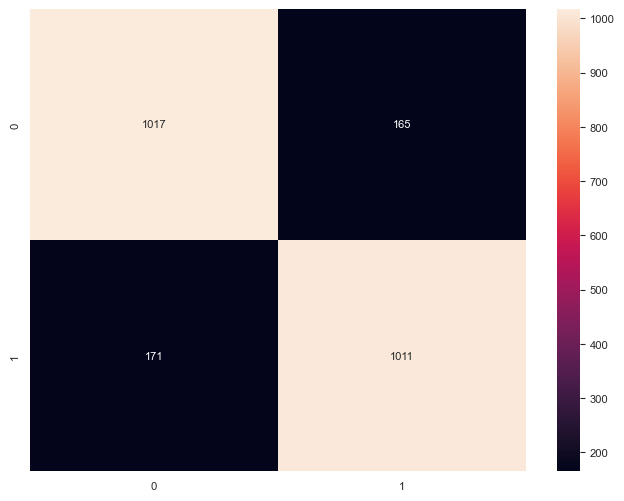

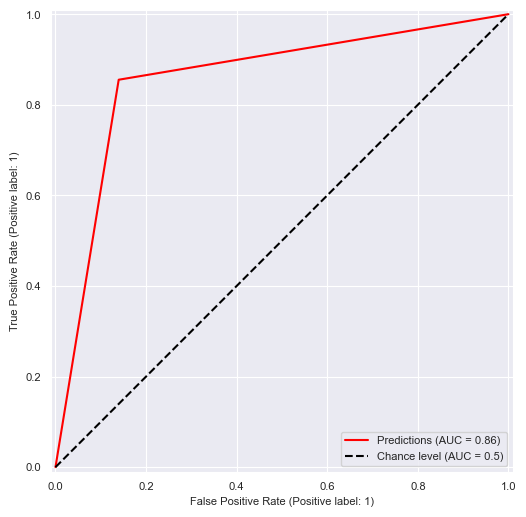

(<Axes: >,
 [Text(0.5, 20.0, 'False Positive Rate'),
  Text(19.999999999999993, 0.5, 'True Positive Rate'),
  Text(0.5, 1.0, 'ROC curves')])

In [342]:
results(y_train_enc, y_pred)

Results on val

In [331]:
y_pred_val = lr.predict(X_val_scaled)

Accuracy : 0.86
Recall : 0.82
Precision: 0.88
------------------------------------------------------------
Classification Report:               precision    recall  f1-score   support

           0       0.83      0.89      0.86       296
           1       0.88      0.82      0.85       296

    accuracy                           0.86       592
   macro avg       0.86      0.86      0.86       592
weighted avg       0.86      0.86      0.86       592



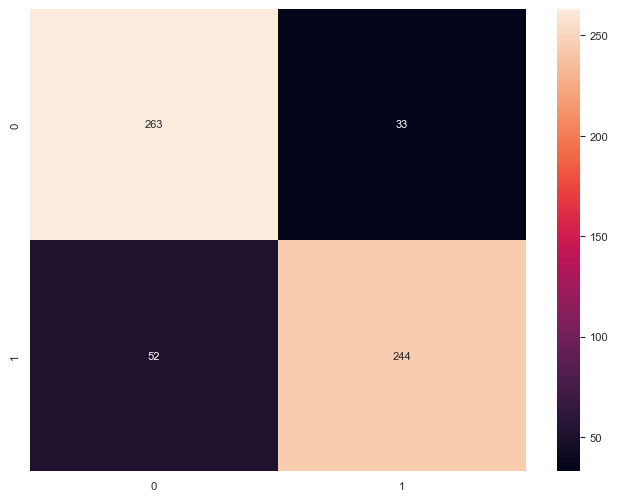

(<Axes: >,
 [Text(0.5, 20.0, 'False Positive Rate'),
  Text(19.999999999999993, 0.5, 'True Positive Rate'),
  Text(0.5, 1.0, 'ROC curves')])

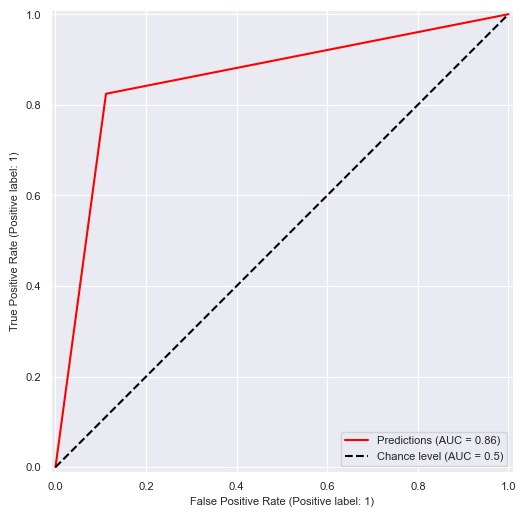

In [346]:
results(y_val_enc, y_pred_val)

Both results are quite good, taking into account that it is a base model.

## K-Means
### Best k

In [1]:
def n_k_means(data, max_k):
    means = []
    inertia = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)

        means.append(k)
        inertia.append(kmeans.inertia_)

    # elbow plot
    fig = plt.subplots()
    plt.plot(means, inertia, 'o-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()


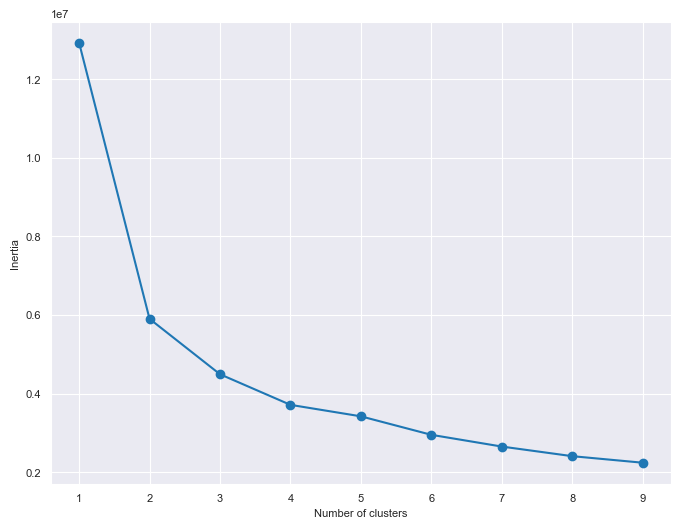

In [339]:
n_k_means(X_train_enc, 10)

### Building a Neural Network model

In [361]:
X_val_scaled.shape

(592, 23)

In [362]:
#Rehsaping into 3 dim
X_train_conv = X_train_scaled.reshape(2364, 23, -1)
X_val_conv = X_val_scaled.reshape(592, 23, -1)

In [472]:
# Build the model

epochs = 30

model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape= X_train_conv[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu', ))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu', ))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [473]:
model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_20 (Conv1D)              │ (None, 22, 32)         │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 22, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 22, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_21 (Conv1D)              │ (None, 21, 64)         │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 21, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 21, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 1344)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │        86,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 90,785 (354.63 KB)

 Trainable params: 90,593 (353.88 KB)

 Non-trainable params: 192 (768.00 B)

In [474]:
optimizer = Adam(learning_rate=0.001)
loss = 'binary_crossentropy'
metrics = ['accuracy', 'recall']

In [475]:
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [476]:
history = model.fit(X_train_conv, y_train_enc, epochs=epochs, validation_data=(X_val_conv, y_val_enc), verbose=2)

Epoch 1/30


74/74 - 3s - 44ms/step - accuracy: 0.7580 - loss: 0.6189 - recall: 0.7563 - val_accuracy: 0.8581 - val_loss: 0.5452 - val_recall: 0.8209
Epoch 2/30
74/74 - 0s - 6ms/step - accuracy: 0.8181 - loss: 0.4405 - recall: 0.8232 - val_accuracy: 0.8716 - val_loss: 0.4664 - val_recall: 0.8649
Epoch 3/30
74/74 - 0s - 5ms/step - accuracy: 0.8418 - loss: 0.3884 - recall: 0.8401 - val_accuracy: 0.8581 - val_loss: 0.4054 - val_recall: 0.8142
Epoch 4/30
74/74 - 0s - 6ms/step - accuracy: 0.8532 - loss: 0.3493 - recall: 0.8528 - val_accuracy: 0.8649 - val_loss: 0.3415 - val_recall: 0.7905
Epoch 5/30
74/74 - 0s - 5ms/step - accuracy: 0.8706 - loss: 0.3165 - recall: 0.8613 - val_accuracy: 0.8801 - val_loss: 0.2896 - val_recall: 0.8446
Epoch 6/30
74/74 - 0s - 5ms/step - accuracy: 0.8761 - loss: 0.2931 - recall: 0.8773 - val_accuracy: 0.8970 - val_loss: 0.2582 - val_recall: 0.8750
Epoch 7/30
74/74 - 0s - 5ms/step - accuracy: 0.8879 - loss: 0.2864 - recall: 0.8883 - val_accuracy: 0.9037 - val_loss: 0.2430 - 

In [464]:
def learning_curve_plot(history, epoch):
    epoch_range = range(1, epoch+1)
    plt.figure(figsize=(10, 14))

    # Plotting accuracy values
    plt.subplot(3,1,1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Val'])
    plt.show

    # Plotting recall values
    plt.subplot(3,1,2)
    plt.plot(epoch_range, history.history['recall'])
    plt.plot(epoch_range, history.history['val_recall'])
    plt.title('Model Recall')
    plt.xlabel('Epoch')
    plt.ylabel('Recall')
    plt.legend(['Train', 'Val'])
    plt.show

    # Plotting loss values
    plt.subplot(3,1,3)
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Val'])
    plt.show

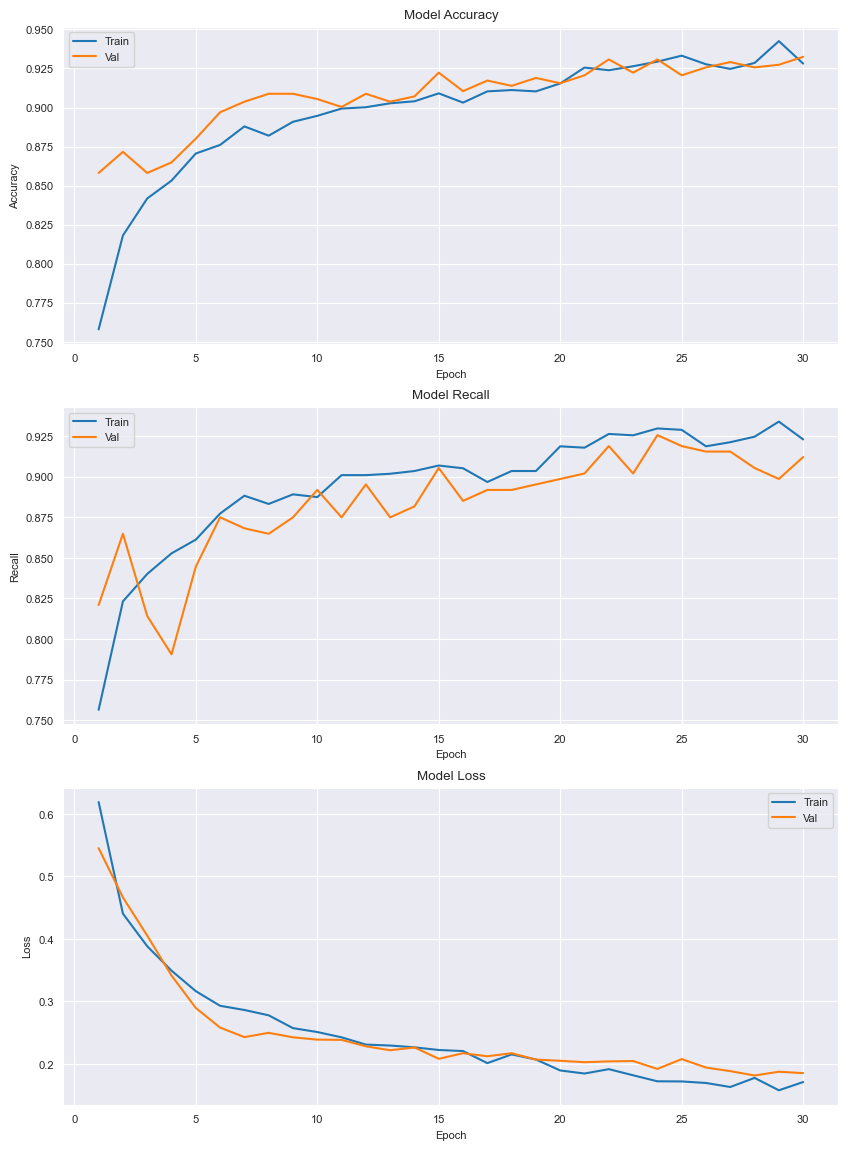

In [477]:
learning_curve_plot(history, epochs)